In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set(style="darkgrid")

In [18]:
path = "Despesas_Cefisma_set2016.xls"

In [19]:
raw = pd.read_excel(path, sheetname=None)
new_raw = {'nome': [], 'valor':[], 'data': [], 'tipo':[]}

In [20]:
for k in raw.keys():
    temp_raw = raw[k]
    for t in temp_raw.iterrows():
        t = t[1]
        datetim = t.Data
        new_raw['data'].append(datetim)
        new_raw['nome'].append(t.Nome)
        sign = 0
        if t["Débito/Crédito"] == "Débito":
            sign = -1
        else:
            sign = 1
        valor = t.Valor * sign
        new_raw['valor'].append(valor)
        new_raw['tipo'].append(k)
new_raw = pd.DataFrame(new_raw)

In [21]:
new_raw = new_raw.sort_values("data")
new_raw.to_csv("cefisma.csv", index=False)


In [22]:
dat = pd.read_csv("cefisma.csv", parse_dates=["data"])

In [23]:
per = pd.Period("2015-1", freq="D")

In [24]:
periods = pd.date_range("2015-02", "2016-09", freq="M")

In [25]:
n = len(periods)
receitas = np.zeros(n)
despesas = np.zeros(n)
balanco = np.zeros(n)
periodo = []
i = 0

for p in periods:
    datp = dat[(p-1 < dat.data) & (dat.data < p)]
    receitas[i] = np.sum(datp[datp.valor >= 0].valor)
    despesas[i] = np.sum(datp[datp.valor < 0].valor)
    balanco[i] = np.sum(datp.valor)
    periodo.append(p)
    i += 1

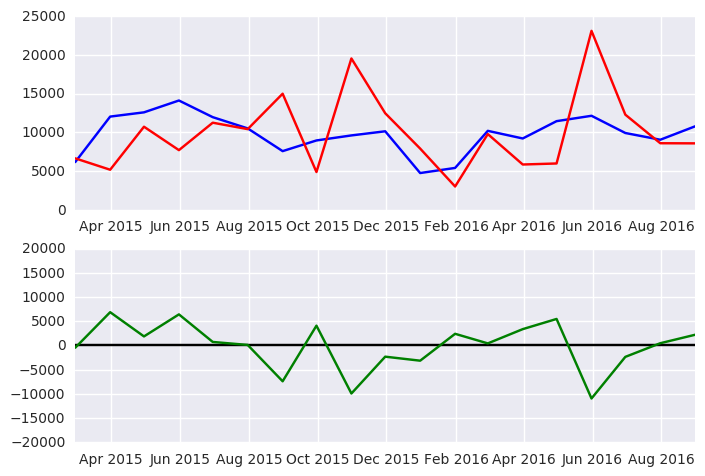

In [30]:
plt.subplot("211")
plt.plot(periodo, receitas, 'b-')
plt.plot(periodo, -despesas, 'r-')
plt.subplot("212")
plt.plot(periodo, np.zeros(len(periodo)), 'k-')
plt.plot(periodo, balanco, 'g-')
plt.ylim((-2e4, 2e4))
plt.show()

In [31]:
tipos = np.unique(dat.tipo)
receita_total = np.sum(dat[dat.valor > 0].valor)
despesa_total = np.sum(dat[dat.valor < 0].valor)

receita_soma = {"tipo":[], "valor":[], "fracao":[]}
despesa_soma = {"tipo":[], "valor":[], "fracao":[]}

def appendal(dic, tipo, valor, fracao):
    dic["tipo"].append(tipo)
    dic["valor"].append(valor)
    dic["fracao"].append(fracao)

for tipo in tipos:
    dat_tipo = dat[dat.tipo == tipo]
    valor = np.sum(dat_tipo.valor)
    porcentagem = 0
    if valor > 0:
        porcentagem = valor / receita_total
        appendal(receita_soma, tipo, valor, porcentagem)
    else:
        porcentagem = valor / despesa_total
        appendal(despesa_soma, tipo, valor, porcentagem)

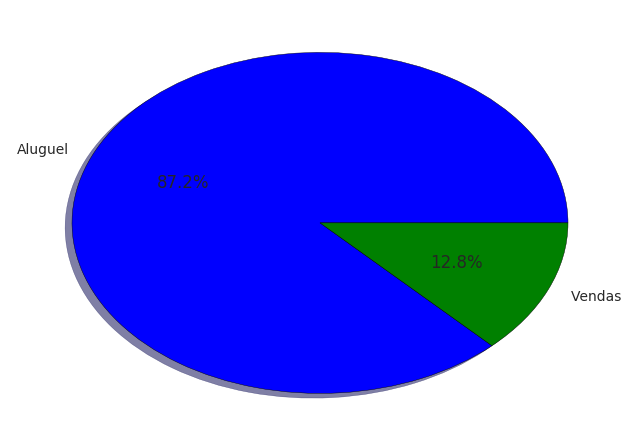

In [32]:
plt.pie(receita_soma["fracao"], labels=receita_soma["tipo"], shadow=True,
        autopct="%1.1f%%")
plt.show()


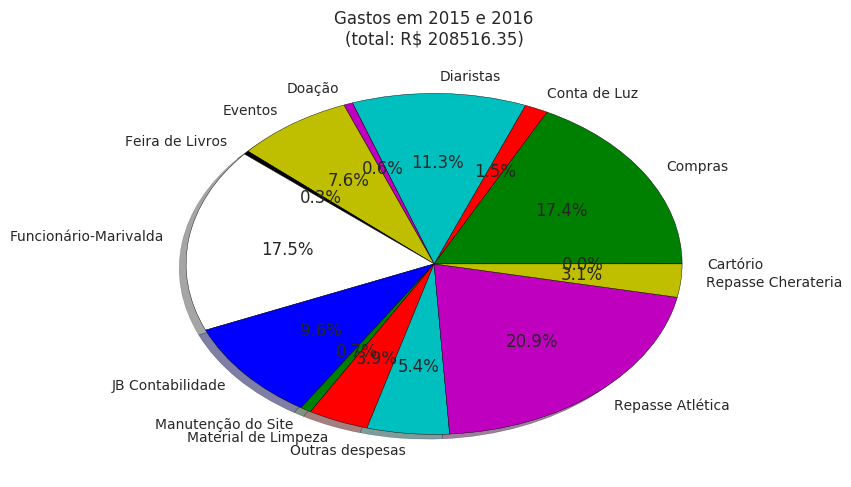

In [33]:
plt.title("Gastos em 2015 e 2016\n(total: R$ %.2f)" % -despesa_total)
plt.pie(despesa_soma["fracao"], labels=despesa_soma["tipo"], shadow=True,
        autopct="%1.1f%%")
plt.show()

In [38]:
dat[dat.tipo == "Outras despesas"]

,data,nome,tipo,valor
78,2015-02-26,Locomoção para aquisição de equipamento,Outras despesas,-50.00
104,2015-03-06,Limpeza vidros (Janelas e Potas),Outras despesas,-50.00
140,2015-03-26,Café com quantum,Outras despesas,-31.25
146,2015-03-27,Lanches (Reunião Cefisma),Outras despesas,-30.00
310,2015-06-12,Limpeza vidros (Janelas e Potas),Outras despesas,-50.00
314,2015-06-12,Café com quantum,Outras despesas,-15.89
345,2015-07-10,Locomoção para aquisição de equipamento,Outras despesas,-94.00
402,2015-08-17,Limpeza vidros Secretária,Outras despesas,-20.00
428,2015-09-03,Café com quantum,Outras despesas,-30.09
460,2015-10-02,Rugby (EMPRESTIMO),Outras despesas,-2900.00
